In [1]:
import numpy as np
import cv2

def gaussian_noise(image):
    row,col,ch= image.shape
    gauss = np.random.normal(0,0.05**0.5,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy

def poisson_noise(image):
    vals = 2 ** np.ceil(np.log2(len(np.unique(image))))
    noisy = np.random.poisson(image * vals) / float(vals)
    return noisy

def average_filter(image):
    blur = cv2.blur(src=image, ksize=(5,5))
    return blur

def guassian_filter(image):
    blur = cv2.GaussianBlur(src=image, ksize=(5,5), sigmaX=0, sigmaY=0)
    return blur

def median_filter(image):
    blur = cv2.medianBlur(src=image, ksize=5)
    return blur

def bilateral_filter(image):
    blur = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)
    return blur

def sharpening(image):
    kernel = np.array([[0, -1,  0],
                       [-1,  5, -1],
                       [0, -1,  0]])
    sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    return sharp


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'rotate')

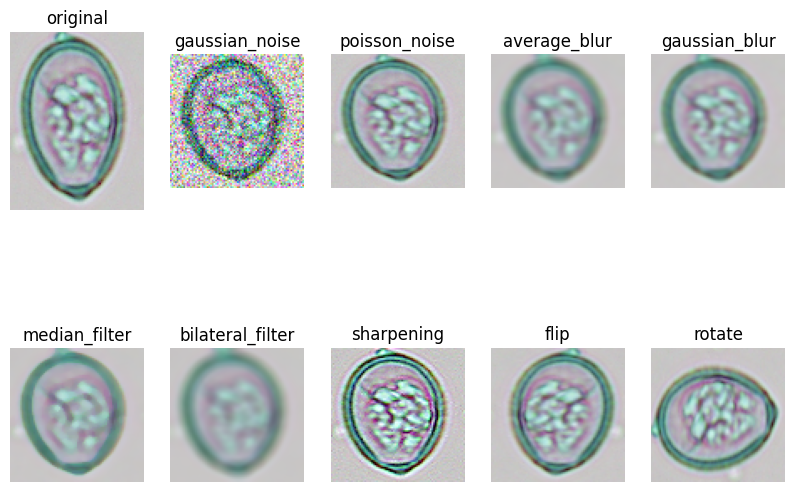

In [5]:
## for testing

import os
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

#install package
!pip install -q keras

#mount google drive into colab notebook
from google.colab import drive
drive.mount('/content/drive')

dir_all = '/content/drive/My Drive/Chula-ParasiteEgg-11/Chula-ParasiteEgg-11/ov_image_30/egg/'
dir_img= os.listdir(dir_all)
augmented_img = []

#visualize the augmented_img
img_read  = plt.imread(os.path.join(dir_all,dir_img[1]))
img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)
img_resize = cv2.resize(img_read, (80,80))
img_array = img_to_array(img_resize)

vertical_flip = np.fliplr(img_array)
horizontal_flip = np.flipud(img_array)
rotates = np.rot90(img_array)

augmented_img = [gaussian_noise(img_array),poisson_noise(img_array),average_filter(img_array),
                 guassian_filter(img_array),median_filter(img_array),bilateral_filter(img_array),
                 sharpening(img_array), vertical_flip, horizontal_flip, rotates]

fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 5

fig.add_subplot(rows, columns, 1)
plt.imshow(img_read)
plt.axis('off')
plt.title("original")

fig.add_subplot(rows, columns, 2)
plt.imshow(augmented_img[0])
plt.axis('off')
plt.title("gaussian_noise")

fig.add_subplot(rows, columns, 3)
plt.imshow(augmented_img[1])
plt.axis('off')
plt.title("poisson_noise")

fig.add_subplot(rows, columns, 4)
plt.imshow(augmented_img[2])
plt.axis('off')
plt.title("average_blur")

fig.add_subplot(rows, columns, 5)
plt.imshow(augmented_img[3])
plt.axis('off')
plt.title("gaussian_blur")

fig.add_subplot(rows, columns, 6)
plt.imshow(augmented_img[4])
plt.axis('off')
plt.title("median_filter")

fig.add_subplot(rows, columns, 7)
plt.imshow(augmented_img[5])
plt.axis('off')
plt.title("bilateral_filter")

fig.add_subplot(rows, columns, 8)
plt.imshow(augmented_img[6])
plt.axis('off')
plt.title("sharpening")

fig.add_subplot(rows, columns, 9)
plt.imshow(augmented_img[7])
plt.axis('off')
plt.title("flip")

fig.add_subplot(rows, columns, 10)
plt.imshow(augmented_img[9])
plt.axis('off')
plt.title("rotate")